<a href="https://colab.research.google.com/github/sipocz/pid_time_series/blob/main/pid_NN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import os
import seaborn as sns

In [72]:
from google.colab import drive

In [73]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
#user = "Anna"
user = "SL"
uzem = "Szint1"
data_source="5"
#fname="72C03_TC_error_toNN.csv"
fname_good = "415_SC_error_part1.csv"
fname_bad = "415_SC_error_part2.csv"

In [75]:
# Elérési út a 415_SC_error-hoz
if user=="Anna":
    path_good = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/" + data_source + "/" + fname_good
    path_bad = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/" + data_source + "/" + fname_bad
    path_fig = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/plots/"
else:
    path_good = "/content/drive/MyDrive/2022Anna/Datapipeline/" + data_source + "/" + fname_good
    path_bad = "/content/drive/MyDrive/2022Anna/Datapipeline/" + data_source + "/" + fname_bad
    path_fig = "/content/drive/MyDrive/2022Anna/Datapipeline/plots/"


In [76]:
print(path_good)
print(path_bad)

/content/drive/MyDrive/2022Anna/Datapipeline/5/415_SC_error_part1.csv
/content/drive/MyDrive/2022Anna/Datapipeline/5/415_SC_error_part2.csv


In [77]:
df_good = pd.read_csv(path_good,usecols=None)
df_bad = pd.read_csv(path_bad,usecols=None)

In [78]:
print(df_good.isnull().values.any())
print(df_bad.isnull().values.any())

False
False


In [79]:
df_good.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-54.810024,-80.342186,-60.770203,-41.081482,-21.779583,-3.82353,-0.806820,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875
1,-80.342186,-60.770203,-41.081482,-21.779583,-3.823530,-0.80682,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875


In [80]:

import matplotlib.pyplot as plot

df_ = df_good

# You must normalize the data before applying the fit method
df_good_normalized=(df_ - df_.mean()) / df_.std()

# Normalize bad data with the good data parameters
df_bad_normalized=(df_bad - df_.mean()) / df_.std()

In [81]:
df_good_normalized["state"]=0
df_bad_normalized["state"]=1

In [82]:
df_good_normalized

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,state
0,-10.681306,-16.586266,-14.612051,-11.087981,-6.293341,-1.192618,-0.315574,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0
1,-15.654548,-12.549683,-9.889987,-5.905180,-1.164099,-0.314249,-0.016141,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0
2,-11.842250,-8.489023,-5.260696,-1.083756,-0.302359,-0.015017,-0.016141,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0
3,-8.007214,-4.508142,-0.954188,-0.273732,-0.008793,-0.015017,-0.016141,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0
4,-4.247524,-0.804833,-0.230672,0.002217,-0.008793,-0.015017,-0.016141,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,0.037801,0.029297,0.015806,0.002217,-0.008793,-0.015017,-0.016141,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0
1054,0.037801,0.029297,0.015806,0.002217,-0.008793,-0.015017,-0.016141,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0
1055,0.037801,0.029297,0.015806,0.002217,-0.008793,-0.015017,-0.016141,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0
1056,0.037801,0.029297,0.015806,0.002217,-0.008793,-0.015017,-0.016141,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0


In [83]:
df_all_normalized=pd.concat([df_good_normalized,df_bad_normalized],axis=0)

In [84]:
df_all_normalized.tail()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,state
1263,0.029553,0.020564,0.005651,-0.009153,-0.020888,-0.027346,-0.028478,-0.028763,-0.028763,-0.028763,...,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,1
1264,0.029553,0.020564,0.005651,-0.009153,-0.020888,-0.027346,-0.028478,-0.028763,-0.028763,-0.028763,...,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,1
1265,0.029553,0.020564,0.005651,-0.009153,-0.020888,-0.027346,-0.028478,-0.028763,-0.028763,-0.028763,...,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,1
1266,0.029553,0.020564,0.005651,-0.009153,-0.020888,-0.027346,-0.028478,-0.028763,-0.028763,-0.028763,...,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,1
1267,0.029553,0.020564,0.005651,-0.009153,-0.020888,-0.027346,-0.028478,-0.028763,-0.028763,-0.028763,...,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,1


In [121]:
from keras.layers import InputLayer, Dense, LSTM, Input, Dropout
from keras.models import Sequential, Model
from keras.optimizers import SGD,Adam,Adamax,Nadam,Ftrl,Adadelta
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.backend import clear_session
from tensorflow.keras.losses import mean_absolute_percentage_error, huber,kld
from sklearn.model_selection import train_test_split

clear_session()

kernel_reg_1=tf.keras.regularizers.L2(0.1)

input_size=20
drop_frac0=0.05  
drop_frac1=0.0  

input1=Input(shape=(input_size,))
l1_out=Dense(135,activation="swish",)(input1) # kernel_initializer='lecun_normal'
l2_out=Dropout(drop_frac0)(l1_out)


l3_out=Dense(15,activation="swish",)(l2_out) #kernel_initializer='lecun_normal',
l4_out=Dropout(drop_frac1)(l3_out)

pred=Dense(1, activation="sigmoid",)(l4_out)

model = Model(inputs=input1, outputs=pred)
optimizer=Adamax(learning_rate=0.01,) #

model.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=["accuracy"])

In [122]:
# 35 5 1 relu relu sigmoid SGD 0.01 loss: 0.1402 - accuracy: 0.9435 - val_loss: 0.7302 - val_accuracy: 0.8548
# 35 12 1 relu relu sigmoid SGD 0.01 loss 0.1162 94.6% test : 85%
# 17 5 1 relu relu sigmoid SGD 0.01  loss: 0.1714 - accuracy: 0.9300 - val_loss: 0.9535 - val_accuracy: 0.8503
# 35 5 1 relu relu sigmoid Adam 0.01 loss: 0.1238 - accuracy: 0.9467 - val_loss: 5.7545 - val_accuracy: 0.8653
# 35 5 1 relu relu sigmoid Adamax 0.01 loss: 0.1184 - accuracy: 0.9525 - val_loss: 3.5327 - val_accuracy: 0.8428
# 35 5 1 relu relu sigmoid Adamax 0.001 loss: 0.1185 - accuracy: 0.9525 - val_loss: 2.3218 - val_accuracy: 0.8593
# 35 5 1 relu relu sigmoid Adamax 0.001 loss: 0.1041 - accuracy: 0.9576 - val_loss: 5.1465 - val_accuracy: 0.8353  +1300 epoch 
# 135 15 1 swish swish sigmoid Adamax 0.001 loss: 0.1707 - accuracy: 0.9352 - val_loss: 0.8066 - val_accuracy: 0.8892

In [123]:
prediktorok=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19"]
X_NN=df_all_normalized[prediktorok][:-100]  # 
y_NN=df_all_normalized["state"][:-100]

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X_NN,y_NN,train_size=0.7,shuffle=True)

In [125]:
 history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test),
                    
                   verbose=1)


Epoch 1/100
1558/1558 [==============================] - 5s 3ms/step - loss: 0.5398 - accuracy: 0.7670 - val_loss: 0.4866 - val_accuracy: 0.7919
Epoch 2/100
1558/1558 [==============================] - 5s 3ms/step - loss: 0.4714 - accuracy: 0.7901 - val_loss: 0.4773 - val_accuracy: 0.7874
Epoch 3/100
1558/1558 [==============================] - 5s 3ms/step - loss: 0.4451 - accuracy: 0.8030 - val_loss: 0.4724 - val_accuracy: 0.7964
Epoch 4/100
1558/1558 [==============================] - 4s 3ms/step - loss: 0.4192 - accuracy: 0.8100 - val_loss: 0.4603 - val_accuracy: 0.7889
Epoch 5/100
1558/1558 [==============================] - 4s 3ms/step - loss: 0.4051 - accuracy: 0.8164 - val_loss: 0.4595 - val_accuracy: 0.7964
Epoch 6/100
1558/1558 [==============================] - 5s 3ms/step - loss: 0.3901 - accuracy: 0.8235 - val_loss: 0.4483 - val_accuracy: 0.8039
Epoch 7/100
1558/1558 [==============================] - 5s 3ms/step - loss: 0.3761 - accuracy: 0.8318 - val_loss: 0.4476 - val_ac

In [126]:
y_pred=model.predict(X_test)

21/21 [==============================] - 0s 1ms/step


In [127]:
# https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

In [128]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Binarizer
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [129]:
bina_transformer=Binarizer(threshold=0.5)
y_pred_transform=bina_transformer.fit_transform(y_pred)

In [130]:
cm=confusion_matrix(y_test,y_pred_transform)


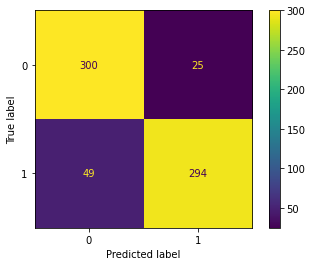

In [131]:
cm_display = ConfusionMatrixDisplay(cm).plot()

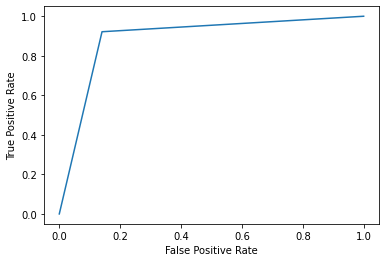

In [132]:
fpr, tpr, _ = roc_curve( y_pred_transform,y_test,pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()